In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\dell\Desktop\MyDocs\Docs\MK\EV_Population.csv')
df = data.copy()
df.head()

,State,Model Year,Make,Electric Vehicle Type,Electric Range,Base MSRP,Legislative District,CAFV Eligibility Simple
0,WA,2020,TESLA,BEV,266,0,46.0,Eligible
1,WA,2024,BMW,PHEV,39,0,46.0,Eligible
2,WA,2024,BMW,PHEV,39,0,43.0,Eligible
3,WA,2018,TESLA,BEV,215,0,1.0,Eligible
4,WA,2012,CHEVROLET,PHEV,35,0,35.0,Eligible


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92676 entries, 0 to 92675
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    92676 non-null  object 
 1   Model Year               92676 non-null  int64  
 2   Make                     92676 non-null  object 
 3   Electric Vehicle Type    92676 non-null  object 
 4   Electric Range           92676 non-null  int64  
 5   Base MSRP                92676 non-null  int64  
 6   Legislative District     92676 non-null  float64
 7   CAFV Eligibility Simple  92676 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 5.7+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Model Year,92676.0,2018.914940,3.277110,1999.0,2017.0,2019.0,2021.0,2025.0
Electric Range,92676.0,115.509388,98.815377,6.0,30.0,73.0,215.0,337.0
Base MSRP,92676.0,2018.564461,11390.579691,0.0,0.0,0.0,0.0,845000.0
Legislative District,92676.0,28.506798,14.649595,1.0,17.0,32.0,41.0,49.0


In [5]:
df.isnull().sum()

State                      0
Model Year                 0
Make                       0
Electric Vehicle Type      0
Electric Range             0
Base MSRP                  0
Legislative District       0
CAFV Eligibility Simple    0
dtype: int64

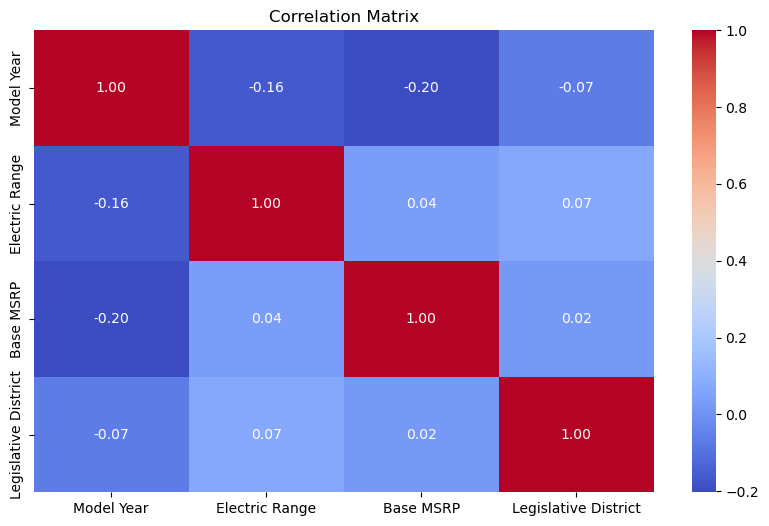

In [6]:
df_numerical = df.select_dtypes(include = ['Float64','int64'])
correlation_matrix = df_numerical.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

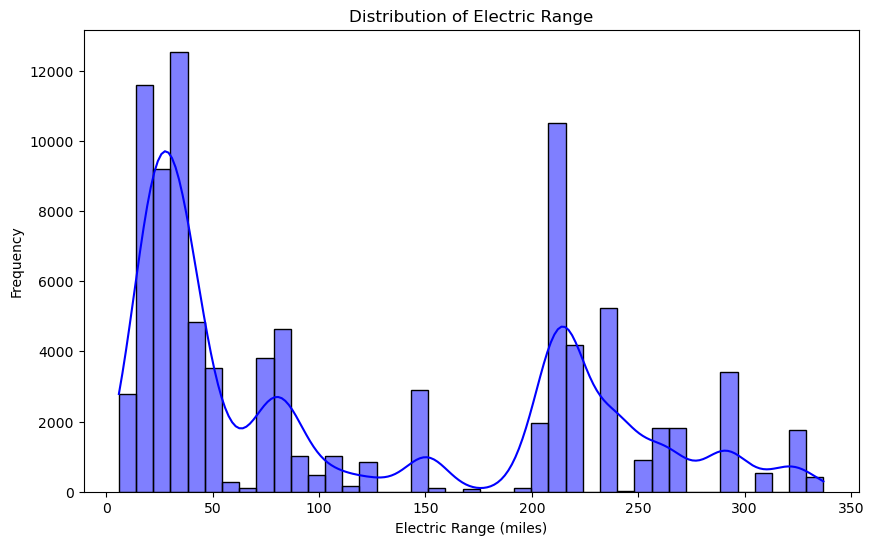

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], kde=True, color='blue')
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Frequency')
plt.show()

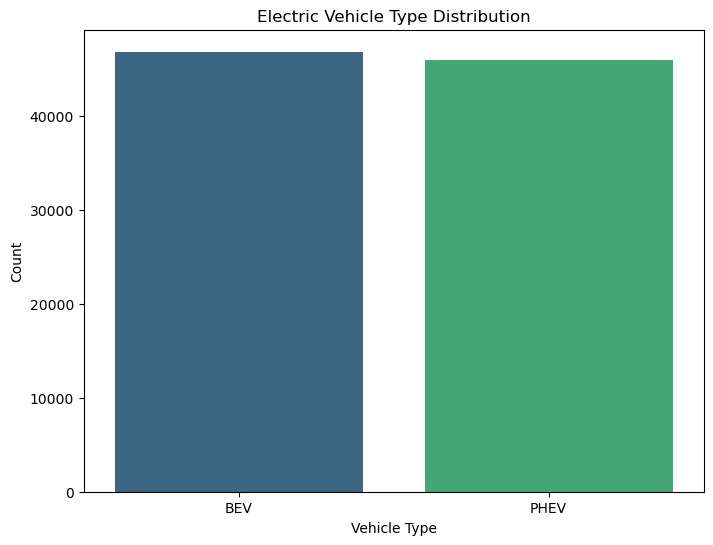

In [8]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Electric Vehicle Type', data=df, palette='viridis')
plt.title('Electric Vehicle Type Distribution')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()

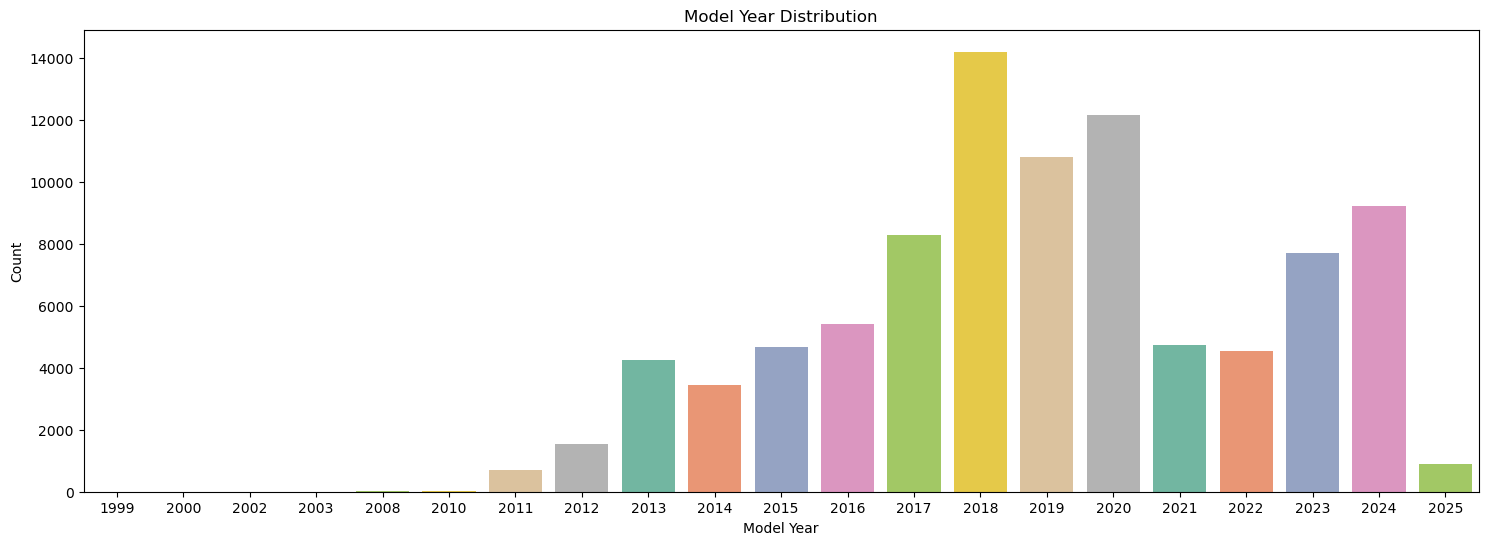

In [9]:
plt.figure(figsize=(18, 6))
sns.countplot(x='Model Year', data=df, palette='Set2')
plt.title('Model Year Distribution')
plt.xlabel('Model Year')
plt.ylabel('Count')
plt.show()

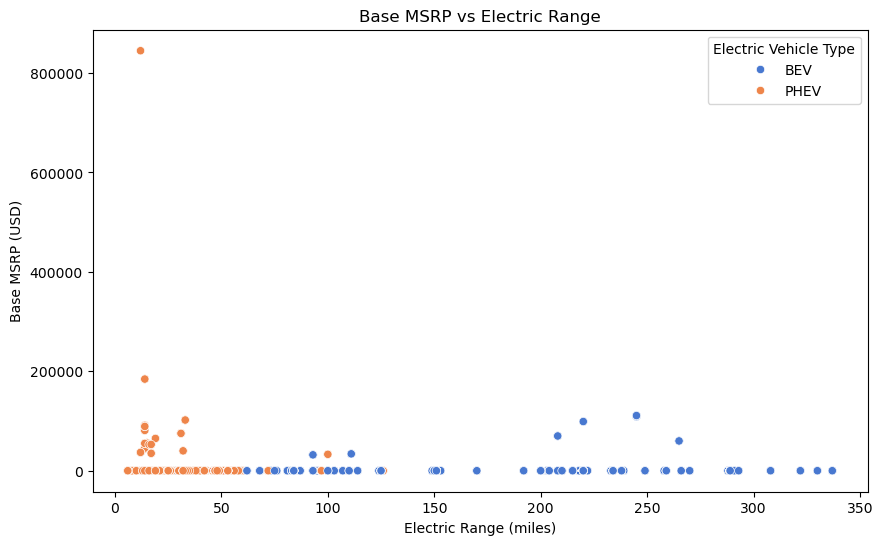

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Electric Range', y='Base MSRP', data=df, hue='Electric Vehicle Type', palette='muted')
plt.title('Base MSRP vs Electric Range')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP (USD)')
plt.show()

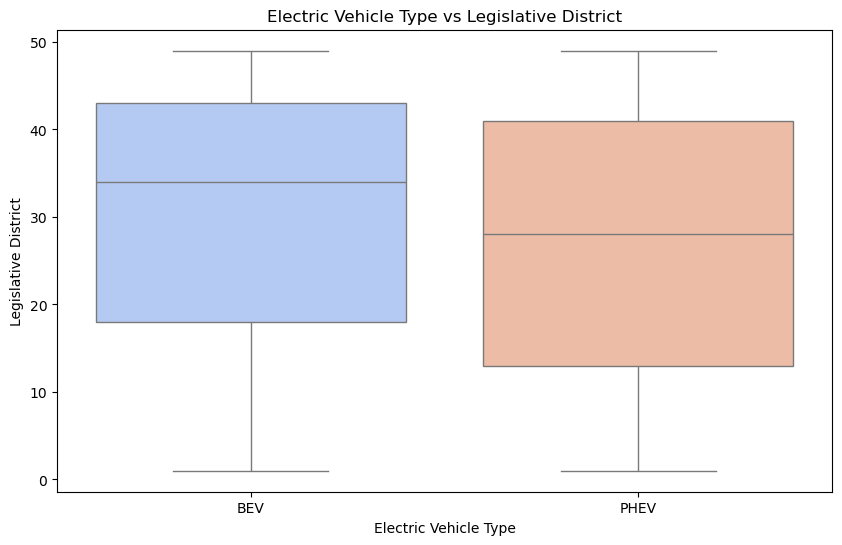

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Electric Vehicle Type', y='Legislative District', data=df, palette='coolwarm')
plt.title('Electric Vehicle Type vs Legislative District')
plt.xlabel('Electric Vehicle Type')
plt.ylabel('Legislative District')
plt.show()

In [12]:
label_encoders = {}


categorical_columns = df.select_dtypes(include=['object']).columns


for column in categorical_columns:
   
    original_values = df[column].unique()
    
 
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])
    
    
    encoded_values = df[column].unique()
    
    decoded_values = label_encoders[column].inverse_transform(encoded_values)
    

    print(f"\n{column} Encoding and Decoding:")
    for enc, dec in zip(encoded_values, decoded_values):
        print(f"{enc} -> {dec}")


State Encoding and Decoding:
0 -> WA

Make Encoding and Decoding:
30 -> TESLA
4 -> BMW
6 -> CHEVROLET
16 -> KIA
32 -> TOYOTA
25 -> NISSAN
15 -> JEEP
9 -> FIAT
11 -> FORD
34 -> VOLVO
7 -> CHRYSLER
19 -> LEXUS
0 -> ALFA ROMEO
14 -> JAGUAR
1 -> AUDI
27 -> PORSCHE
23 -> MINI
21 -> MAZDA
8 -> DODGE
12 -> HONDA
13 -> HYUNDAI
26 -> POLESTAR
22 -> MERCEDES-BENZ
33 -> VOLKSWAGEN
20 -> LINCOLN
24 -> MITSUBISHI
28 -> SMART
18 -> LAND ROVER
29 -> SUBARU
5 -> CADILLAC
31 -> TH!NK
10 -> FISKER
2 -> AZURE DYNAMICS
3 -> BENTLEY
35 -> WHEEGO ELECTRIC CARS
17 -> LAMBORGHINI

Electric Vehicle Type Encoding and Decoding:
0 -> BEV
1 -> PHEV

CAFV Eligibility Simple Encoding and Decoding:
0 -> Eligible
1 -> Not Eligible


In [13]:
X = df[['State', 'Model Year', 'Make', 'Electric Range', 'Base MSRP', 'Legislative District']]
y = df['Electric Vehicle Type']  

X = pd.get_dummies(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = LogisticRegression(max_iter=1000, random_state=42)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9817112645662495
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9284
           1       0.98      0.98      0.98      9252

    accuracy                           0.98     18536
   macro avg       0.98      0.98      0.98     18536
weighted avg       0.98      0.98      0.98     18536



In [15]:
model = SVC(random_state=42)


model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.888703064307294
              precision    recall  f1-score   support

           0       0.99      0.79      0.88      9284
           1       0.82      0.99      0.90      9252

    accuracy                           0.89     18536
   macro avg       0.91      0.89      0.89     18536
weighted avg       0.91      0.89      0.89     18536

